# Oppgave a)

In [1]:
cd ..

/Users/halvortyseng/Desktop/FYS-STK3155-project-2


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# import functions from src folder
import src.regression_tools as rt
import src.regression_cost_funcs as rcf
import src.gradient_descent as gd
import src.data_generation as dg

In [4]:
#generate data
N = 5_000 #nr of data points
x, y, z, true_z = dg.generate_data_Franke(N=N, sigma2=0.01, seed=1)

poly_grad = 5
X = rt.create_X_polynomial(x, y, poly_grad)
z = z.reshape(-1, 1)

# Split data:
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.25)

## Analysis MSE developmens over epochs for different learning-rate 

In [5]:
# We want to models of gradient decent, high and low learning-rate
lr1 = 0.01
lr2 = 0.001

#choose cost function model to investigate:
model = rcf.OLSCost()

descent1 = gd.GradientDescent(mode="normal", momentum_param=0, batch_size=None, store_extra=True)
descent2 = gd.GradientDescent(mode="normal", momentum_param=0, batch_size=None, store_extra=True)

#choose initial weigths and number of epochs
w_init = np.zeros(len(X[0]))
epochs = 10000

#train on the train data and return final weights
w1 = descent1.train(X_train, w_init, z_train, model, learning_rate=lr1, n_epochs = epochs)
w2 = descent2.train(X_train, w_init, z_train, model, learning_rate=lr2, n_epochs = epochs)

#extract weights as a function of epocs
wlog1 = descent1.weights 
wlog2 = descent2.weights 

In [6]:
# Maby make it as a function:

In [13]:
def scatter_3d(x, y, z, title="", filename=""):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    sc_plot = ax.scatter(x, y, z, c=z, cmap='viridis')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    fig.colorbar(sc_plot)
    plt.title(title)
    if filename:
        plt.savefig(filename)

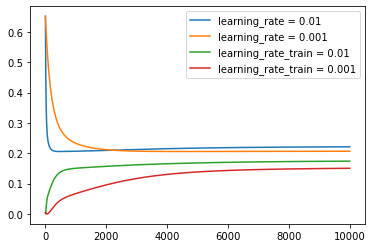

In [7]:
epoc_arr = np.linspace(0, epochs, epochs+1)

# y_pred as an array corrosponding to predictiv y for each epoch 
z_pred_test1 = (X_test@wlog1.T).T
z_pred_train1 = (X_train@wlog1.T).T
MSE_test1 = rt.MSE_vec(z_test[0], z_pred_test1)
MSE_train1 = rt.MSE_vec(z_train[0], z_pred_train1)

# 
z_pred_test2 = (X_test@wlog2.T).T
z_pred_train2 = (X_train@wlog2.T).T
MSE_test2= rt.MSE_vec(z_test[0], z_pred_test2)
MSE_train2 = rt.MSE_vec(z_train[0], z_pred_train2)

plt.plot(epoc_arr, MSE_test1, label=f"learning_rate = {lr1}")
plt.plot(epoc_arr, MSE_test2, label=f"learning_rate = {lr2}")
plt.plot(epoc_arr, MSE_train1, label=f"learning_rate_train = {lr1}")
plt.plot(epoc_arr, MSE_train2, label=f"learning_rate_train = {lr2}")
plt.legend()
plt.show()

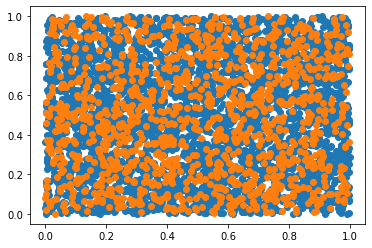

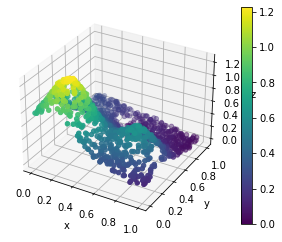

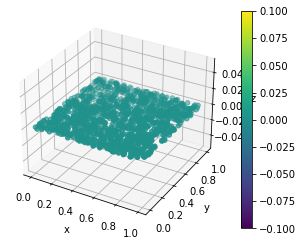

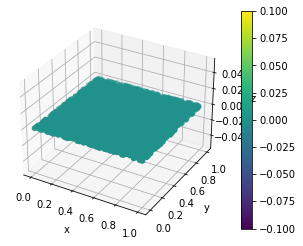

In [21]:
plt.scatter(X_train[:,1], X_train[:,2])
plt.scatter(X_test[:,1], X_test[:,2])
scatter_3d(X_test[:,1], X_test[:,2], z_test)
scatter_3d(X_test[:,1], X_test[:,2], z_pred_test1[0])
scatter_3d(X_train[:,1], X_train[:,2], z_pred_train1[0])
plt.show()

## Analysis MSE over learning rate - Fixed n_epochs

In [8]:

def lr_iter(X, z, lr_range):
    """ """
    
    
    return MSE_array


# create linspace learning-rate
learning_rate_range = np.linspace(0.01, 0.1, 10)